In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [309]:
data = pd.read_csv('/home/arsath/Downloads/data.csv')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [310]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [311]:
data.agg((min,max))

,x1,x2,y
min,-134.369160,-1.348761e+02,0
max,134.508687,1.000000e+08,1


### Since there are only very few missing values, dropping them is not going to affect data at all


In [312]:
data.dropna(axis = 0,inplace = True)
data.shape

(2219, 3)

### Another way of handling missing value is to impute it by training a model and predicting the values based on other features.

### One such way is using KNN Imputer from sklearn

In [313]:
thresh_hold = np.percentile(data['x2'],99.9)
to_drop = data['x2'][data['x2'] > thresh_hold ]
to_drop

1541    9.901000e+07
1948    1.349297e+02
2226    1.000000e+08
Name: x2, dtype: float64

In [314]:
data.drop(to_drop.index,inplace = True)

<AxesSubplot:>

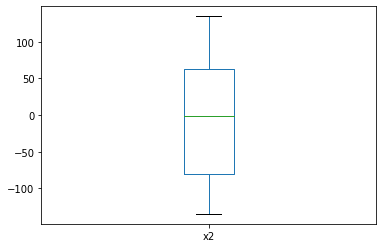

In [315]:
data['x2'].plot(kind = 'box')

<AxesSubplot:xlabel='x1', ylabel='Count'>

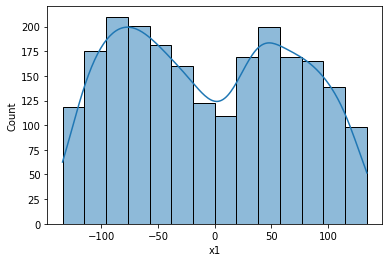

In [316]:
sns.histplot(data['x1'],kde = True)

In [317]:
data.isna().any()

x1    False
x2    False
y     False
dtype: bool

<AxesSubplot:>

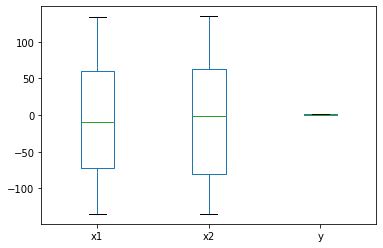

In [318]:
data.plot(kind = 'box')

In [319]:
data.corr()

,x1,x2,y
x1,1.000000,0.108637,-0.119497
x2,0.108637,1.000000,0.063953
y,-0.119497,0.063953,1.000000


In [320]:
st = StandardScaler().fit_transform(data[['x1','x2']])
new_data = pd.DataFrame(st,index = data.index,columns=['x1','x2'])

X = new_data
y = data.loc[:,'y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

<AxesSubplot:>

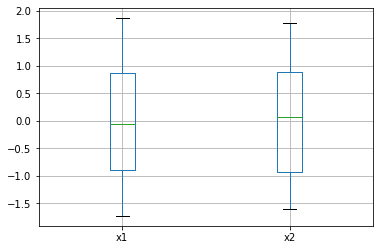

In [340]:
new_data.plot(kind = 'box',grid = True)

In [405]:

decclass = DecisionTreeClassifier()
decclass.fit(X_train,y_train)
pred_dec_tree = decclass.predict(X_test)
accuracy_score(y_test,pred_dec_tree)

0.9338345864661655

In [566]:


param_dist_dec_tree = {"max_depth": [3,None],
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]
        }

rscv_dec = RandomizedSearchCV(decclass,param_distributions=param_dist_dec_tree,cv = 4,n_iter = 50,n_jobs = -1)
rscv_dec.fit(X_train,y_train)
rscv_dec.best_score_


0.9503532992354617

In [335]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
accuracy_score(y_test,pred_svc)

0.9473684210526315

In [336]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train,y_train)
predict_svc_lin = svc_lin.predict(X_test)
accuracy_score(y_test,predict_svc_lin)

0.7413533834586467

In [567]:
param_dist_svc  = {
    'C' : [1.0,1.5,2.0,2.5],
    'kernel' : ['linear','rbf','poly','sigmoid'],
    'degree' : [3,4,5,6],    
}
rscv_svc = RandomizedSearchCV(svc,param_distributions=param_dist_svc,cv = 4,n_iter = 50,n_jobs = -1)
rscv_svc.fit(X_train,y_train)
rscv_svc.best_score_

0.9535716188497296

In [337]:

knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
accuracy_score(y_test,pred_knn)

0.9323308270676691

In [568]:
param_dist_knn = {
    'n_neighbors' : [5,7,9,11],
    'weights' : ['uniform','distance'],
}

rscv_knn = RandomizedSearchCV(knn,param_distributions=param_dist_knn,n_jobs = -1,n_iter = 8,cv = 10)
rscv_knn.fit(X_train,y_train)
rscv_knn.best_score_

0.9535938792390404

In [338]:

log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)
accuracy_score(y_test,pred_log)

0.7488721804511278

In [587]:
param_dist_log = {
    'fit_intercept' : [True,False],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'warm_start' : [True,False],
    'max_iter' : [50,100,130,150]
}


rscv_log = RandomizedSearchCV(log,param_distributions=param_dist_log,n_iter = 10,n_jobs = -1,cv = 10)
rscv_log.fit(X_train,y_train)


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'max_iter': [50, 100, 130, 150],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'warm_start': [True, False]})

In [583]:
dec_best = rscv_dec.best_score_
dec_best

0.9503532992354617

In [584]:
knn_best = rscv_knn.best_score_            
knn_best

0.9535938792390404

In [585]:
svc_best = rscv_svc.best_score_
svc_best

0.9535716188497296

In [589]:
logistic_best = rscv_log.best_score_
logistic_best

0.7408395368072788

<AxesSubplot:>

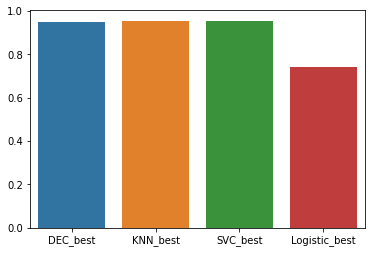

In [591]:
sns.barplot(x = ['DEC_best','KNN_best','SVC_best','Logistic_best'],y = [dec_best,knn_best,svc_best,logistic_best])

### From the Above plot it is clear that Decision tree, Support Vector Classifier and KNN performs very similarly and Logistic Regression performs worst in this case.